In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

#load all the relevant data

vibe_col = [1,2,3,4,5,6]

normfile = "./Online_data/normal/normal/*.csv"
abnormal_6g = "./Online_data/imbalance/6g/*.csv"

def dataReader(path, cols):
    data_n = pd.DataFrame()
    #each column is a vibration signal, each file has 6 signals, make an array of signals
    for file in glob.glob(path):
        df = pd.read_csv(file, usecols=cols)
        for (columnName, columnData) in df.iteritems():
            #make column data into a dataframe
            df1 = pd.DataFrame(columnData)
            #add the dataframe to the data_n dataframe
            data_n = pd.concat([data_n, df1], axis=1)
    return data_n

datanorm = dataReader(normfile, vibe_col)
data6g = dataReader(abnormal_6g, vibe_col)

print(datanorm.shape)
print(data6g.shape)

(249999, 294)
(249999, 294)


(249999,)


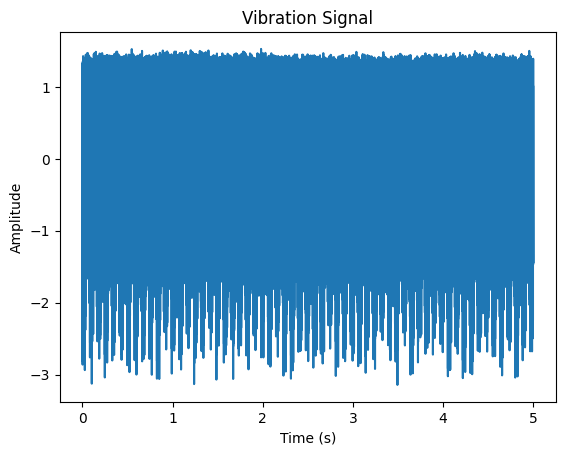

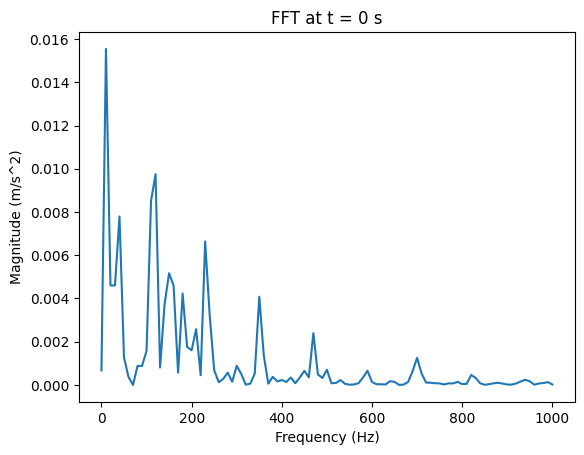

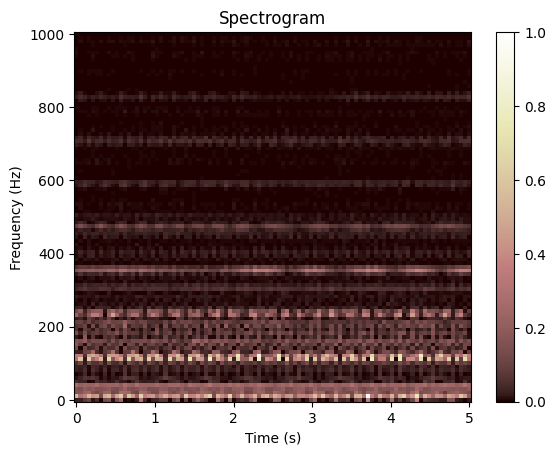

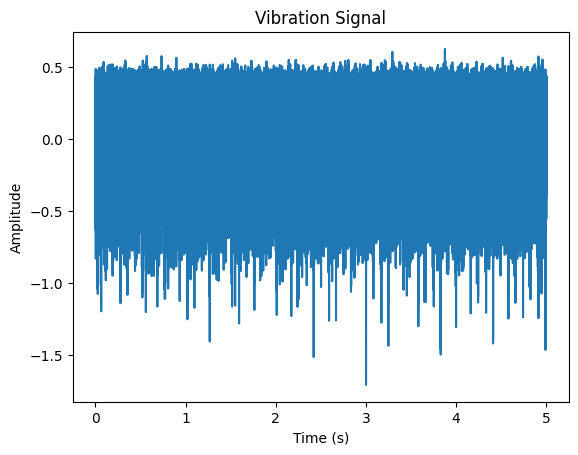

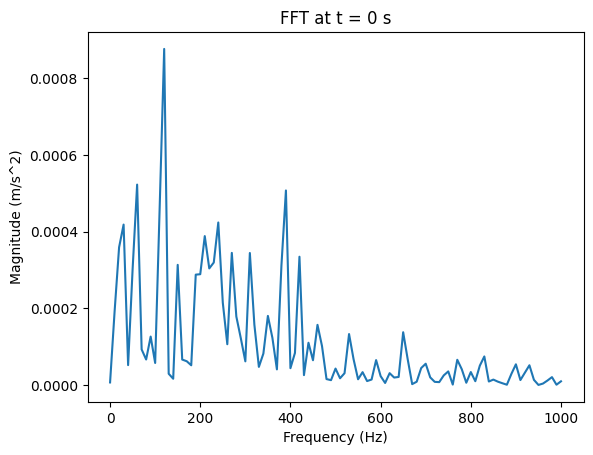

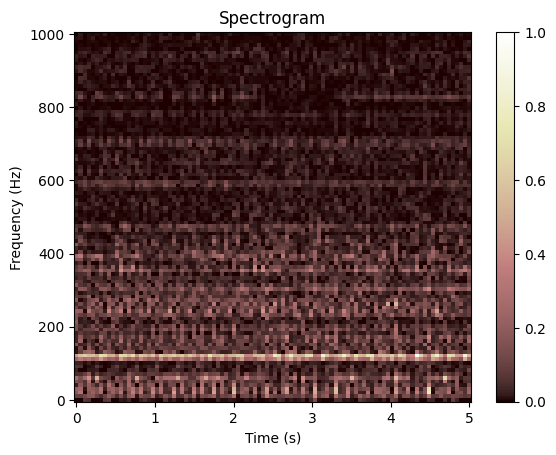

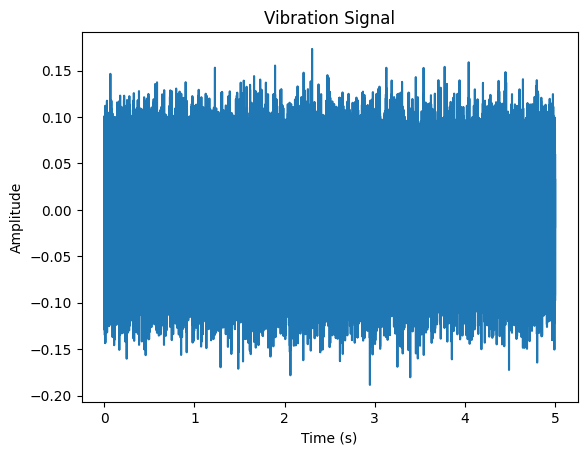

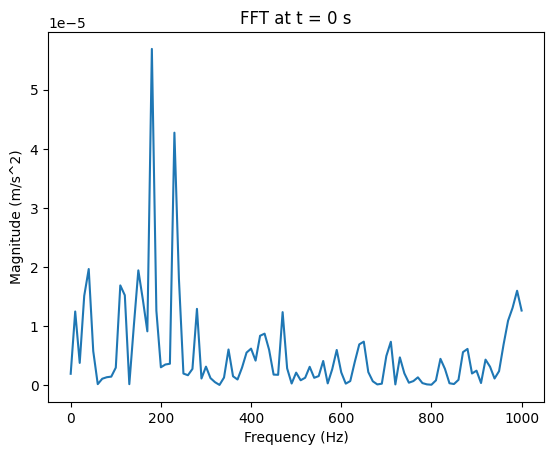

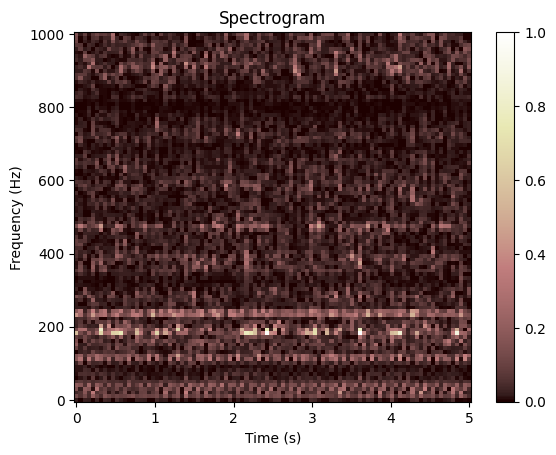

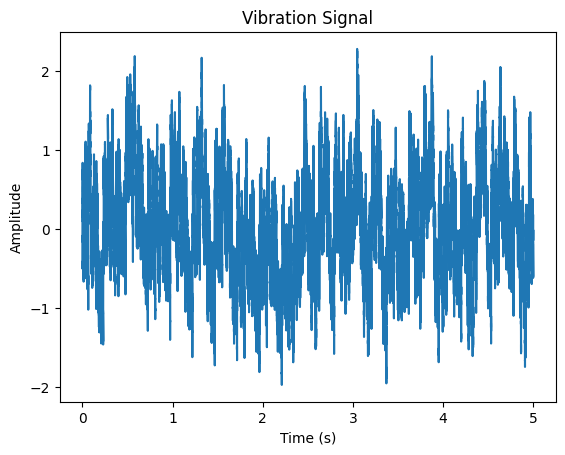

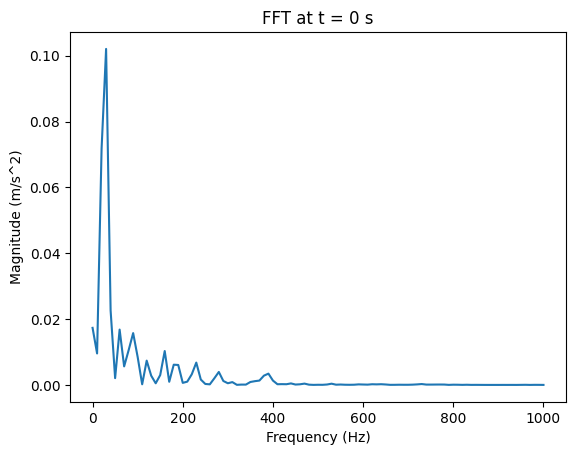

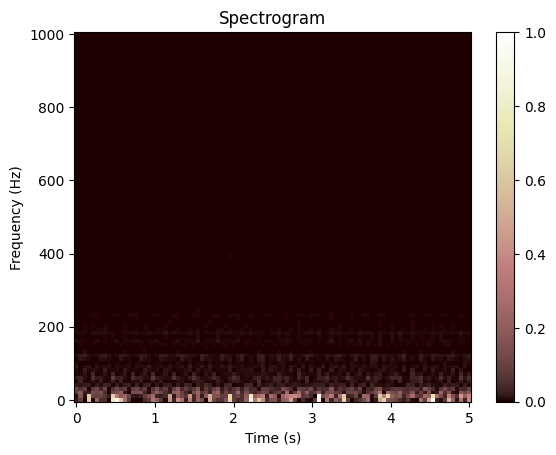

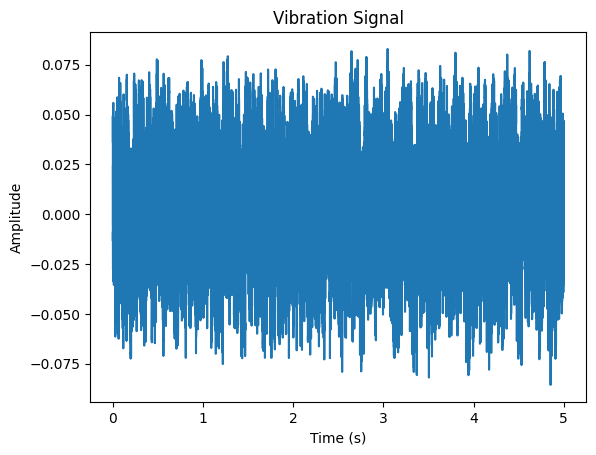

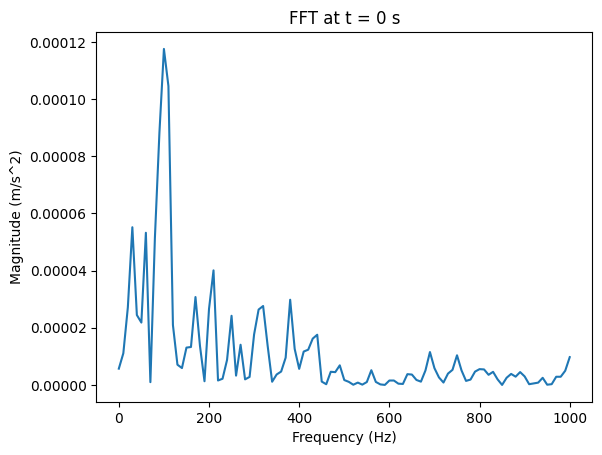

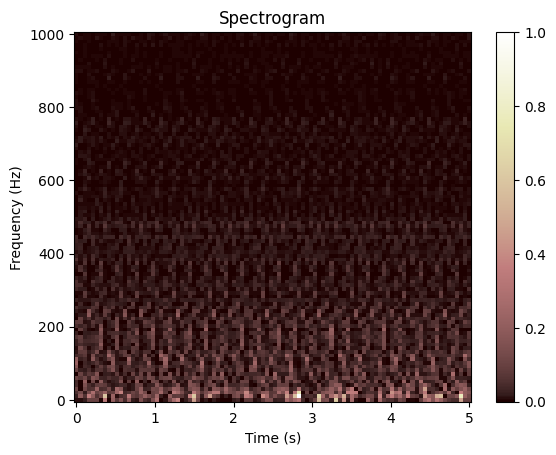

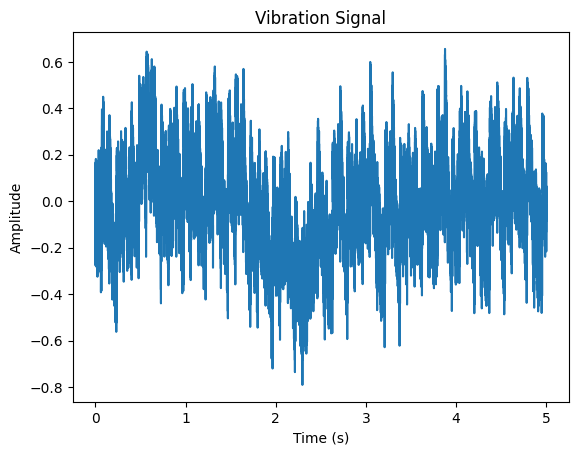

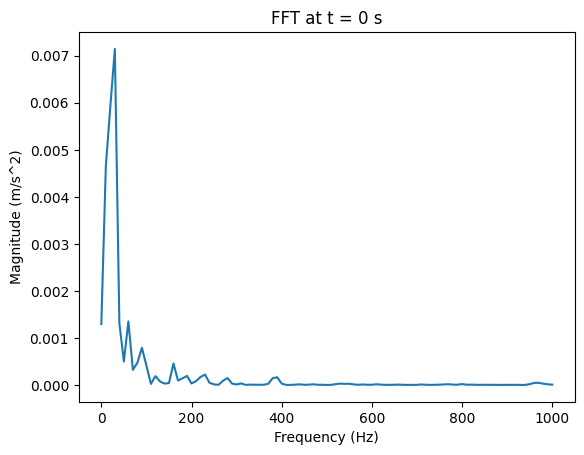

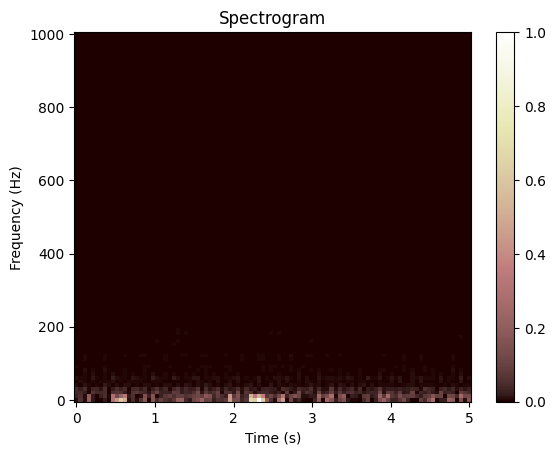

In [142]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy import ndimage

# display 0-1000hz frequency range of the FFT and spectrogram using 50khz sampling rate and 5s duration

def downresolution(data, x_factor, y_factor):
    return ndimage.zoom(data, zoom=(y_factor, x_factor))


def plot_signal_and_spectrogram(sig, plotSig = False, plotFFT = False, plotSpec = False):
    fs = 50000
    duration = 5

    t = np.linspace(0, duration, int(fs * duration) - 1)
    
    
    if plotSig:
        plt.plot(t, sig)
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.title('Vibration Signal')
        plt.show()

    nperseg = 5000  # Update nperseg to capture the desired frequency resolution
    noverlap = nperseg / 2
    # window = np.ones(nperseg)  # Replace Hanning window with rectangular window
    window = np.hanning(nperseg)
    # window = np.hamming(nperseg)
    
    f, ts, Sxx = signal.spectrogram(sig, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap, detrend=False, scaling="spectrum")

    timeframe_idx = np.argmin(np.abs(ts - 0))
    fft_vals = Sxx[:, timeframe_idx]
    freq_bins = f

    # Update frequency range for FFT plot
    frequency_of_interest = 1000
    
    mask = (freq_bins >= 0) & (freq_bins <= frequency_of_interest)
    
    if plotFFT:
        plt.plot(freq_bins[mask], fft_vals[mask])
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Magnitude (m/s^2)')
        plt.title('FFT at t = 0 s')
        plt.show()

    # Update frequency range for spectrogram plot
    # print(Sxx.shape)
    freq_range = int(Sxx.shape[0] * frequency_of_interest / (fs/2))
    
    # Normalize the spectrogram data
    Sxx_interest = Sxx[:freq_range, :]
    Sxx_normalized = (Sxx_interest - Sxx_interest.min()) / (Sxx_interest.max() - Sxx_interest.min())

        
    # Downresolution factors
    x_factor = 0.8  # Reduce the time resolution by a factor of 2
    y_factor = 0.8  # Reduce the frequency resolution by a factor of 2

    Sxx_downres = downresolution(Sxx_normalized, x_factor, y_factor)
        
    
    if plotSpec:
        # downressed spectrogram
        # plt.pcolormesh(np.linspace(0, duration, Sxx_downres.shape[1]), np.linspace(0, frequency_of_interest, Sxx_downres.shape[0]), Sxx_downres, cmap='gist_gray')
            
        # normalization
        plt.pcolormesh(np.linspace(0, duration, Sxx_normalized.shape[1]), np.linspace(0, frequency_of_interest, freq_range), np.abs(Sxx_normalized[:freq_range, :]), cmap='pink')
        
        # no normalization
        # plt.pcolormesh(np.linspace(0, duration, Sxx.shape[1]), np.linspace(0, 1000, freq_range), np.abs(Sxx[:freq_range, :]), cmap='jet')
        
        plt.colorbar()
        plt.ylabel('Frequency (Hz)')
        plt.xlabel('Time (s)')
        plt.title('Spectrogram')
        plt.show()
    
    return Sxx_normalized




# Sample data
# datanorm = pd.DataFrame(np.random.randn(250000, 6))

signal1 = datanorm.iloc[:, 0]
signal2 = datanorm.iloc[:, 1]
signal3 = datanorm.iloc[:, 2]
print(signal3.shape)
signal4 = datanorm.iloc[:, 3]
signal5 = datanorm.iloc[:, 4]
signal6 = datanorm.iloc[:, 5]

plot_signal_and_spectrogram(signal1, True, True, True)
plot_signal_and_spectrogram(signal2, True, True, True)
plot_signal_and_spectrogram(signal3, True, True, True)
plot_signal_and_spectrogram(signal4, True, True, True)
plot_signal_and_spectrogram(signal5, True, True, True)
theshape = plot_signal_and_spectrogram(signal6, True, True, True).shape

height = theshape[0]
width = theshape[1]





# # Resize the spectrogram to a 50x50 image
# Sxx = ndimage.zoom(Sxx, zoom=(50/Sxx.shape[0], 50/Sxx.shape[1]))

# # Plot the spectrogram
# plt.pcolormesh(np.linspace(0, duration, Sxx.shape[1]), np.linspace(
#     0, freq_analyse, Sxx.shape[0]), 20*np.log10(np.abs(Sxx)), cmap='jet')
# plt.colorbar()
# plt.ylabel('Frequency (Hz)')
# plt.xlabel('Time (s)')
# plt.title('Spectrogram of Random Signal with Various Frequencies')
# plt.show()


In [144]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy import ndimage

# load all the data and 6g data and make a spectrogram of each signal
# Prepare an empty list to store the spectrograms and their labels
spectrogram_data = []


# get signal 2 of each set of 6 signals
for i in range(0, datanorm.shape[1], 6):
    signalnorm = datanorm.iloc[:, i+2]
    spec_data = plot_signal_and_spectrogram(signalnorm, False, False, False)
    spectrogram_data.append({'spectrogram': spec_data, 'label': 0})

for i in range(0, data6g.shape[1], 6):
    signal6g = data6g.iloc[:, i+2]
    spec_data = plot_signal_and_spectrogram(signal6g, False, False, False)
    spectrogram_data.append({'spectrogram': spec_data, 'label': 1})
    
# Create a DataFrame with the spectrograms and labels
spectrogram_df = pd.DataFrame(spectrogram_data)

print(spectrogram_df.shape)
print(spectrogram_df)


    
    


(98, 2)
                                          spectrogram  label
0   [[0.01902750991835468, 0.002330079168609603, 0...      0
1   [[0.009483920392128536, 0.0009899687816536842,...      0
2   [[0.0013147549720429895, 0.0003348913095845301...      0
3   [[0.00045006096412668014, 0.000124151684041113...      0
4   [[0.0011828879933776391, 0.0001634150057822809...      0
..                                                ...    ...
93  [[4.346315402536271e-05, 3.410471159888822e-05...      1
94  [[2.0111184879878335e-05, 5.427129356996093e-0...      1
95  [[7.392814244074089e-06, 6.580673843844956e-05...      1
96  [[0.00017017180589404008, 1.4251193111765517e-...      1
97  [[7.970480589282634e-05, 2.1196072327337318e-0...      1

[98 rows x 2 columns]


In [174]:
#start training the CNN model   
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Convert the spectrograms to NumPy arrays and reshape them to be compatible with the CNN input
X = np.array([spec.reshape(spec.shape[0], spec.shape[1], 1) for spec in spectrogram_df['spectrogram']])
y = np.array(spectrogram_df['label'])


# Assuming X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(height, width)

# Reshape the data to be in the format (samples, height, width, channels)
X_train = X_train.reshape(X_train.shape[0], height, width, 1)
X_test = X_test.reshape(X_test.shape[0], height, width, 1)

# Create the CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.0005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Set early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=40, batch_size=16, callbacks=[early_stopping])
# history = model.fit(X_train, y_train, validation_split=0.2, epochs=40, batch_size=16)


# Evaluate the model
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

100 98
Epoch 1/40
4/4 [==============================] - 2s 194ms/step - loss: 0.6895 - accuracy: 0.5323 - val_loss: 0.6921 - val_accuracy: 0.3750
Epoch 2/40
4/4 [==============================] - 0s 111ms/step - loss: 0.6893 - accuracy: 0.4516 - val_loss: 0.6907 - val_accuracy: 0.3750
Epoch 3/40
4/4 [==============================] - 0s 105ms/step - loss: 0.6669 - accuracy: 0.5645 - val_loss: 0.6881 - val_accuracy: 0.4375
Epoch 4/40
4/4 [==============================] - 0s 101ms/step - loss: 0.6718 - accuracy: 0.5161 - val_loss: 0.6875 - val_accuracy: 0.3750
Epoch 5/40
4/4 [==============================] - 0s 96ms/step - loss: 0.6471 - accuracy: 0.5161 - val_loss: 0.6813 - val_accuracy: 0.4375
Epoch 6/40
4/4 [==============================] - 0s 93ms/step - loss: 0.6336 - accuracy: 0.6452 - val_loss: 0.6722 - val_accuracy: 0.4375
Epoch 7/40
4/4 [==============================] - 0s 98ms/step - loss: 0.6330 - accuracy: 0.6452 - val_loss: 0.6591 - val_accuracy: 0.6250
Epoch 8/40
4/4 [

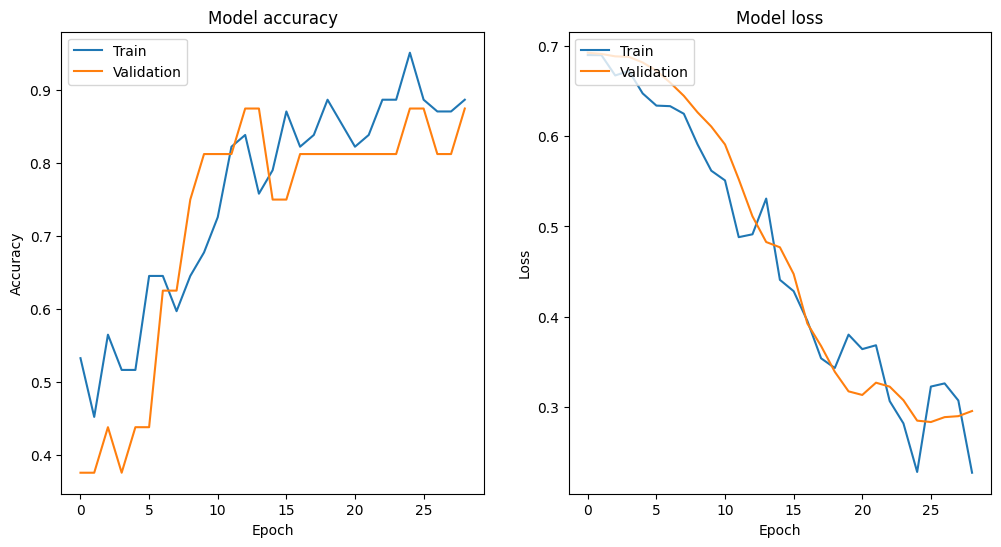

In [175]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()